In [89]:
import sys 
sys.path.append('/pl/active/banich/studies/Relevantstudies/abcd/env/lib/python3.7/site-packages')
sys.path.append('/pl/active/banich/studies/Clearvale/jake_scripts/Amy_flywheel_scripts/')

import numpy as np
import pandas as pd
import os

In [90]:
wm_networks = pd.read_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/rest/rest_gradients/wm_networks.csv')
wm_networks = wm_networks.reset_index()

In [91]:
wm_networks

,index,Subtype
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
355,355,4
356,356,4
357,357,4
358,358,3


In [92]:
g1 = pd.read_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/grp/group/group_g1_all_ops.csv').iloc[:, 2:6]
g1.columns = ['maintain_g1', 'replace_g1', 'suppress_g1', 'clear_g1']

g2 = pd.read_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/grp/group/group_g2_all_ops.csv').iloc[:, 2:6]
g2.columns = ['maintain_g2', 'replace_g2', 'suppress_g2', 'clear_g2']

g3 = pd.read_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/grp/group/group_g3_all_ops.csv').iloc[:, 2:6]
g3.columns = ['maintain_g3', 'replace_g3', 'suppress_g3', 'clear_g3']

In [93]:
op_grads = pd.concat([g1, g2, g3], axis=1).reset_index()
op_grads = pd.merge(op_grads, wm_networks, on='index')

In [94]:
main = op_grads.filter(regex='index|Subtype|main')
replace = op_grads.filter(regex='index|Subtype|replace')
suppress = op_grads.filter(regex='index|Subtype|suppress')
clear = op_grads.filter(regex='index|Subtype|clear')

In [95]:
op_grads_long = op_grads.melt(id_vars=['index', 'Subtype'])

In [96]:
op_grads_long[['condition', 'group']] = op_grads_long ['variable'].str.split('_', expand=True)

op_grads_long.to_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/grp/group_op_grads_long.csv', index=False)

In [97]:
op_grads_long 

,index,Subtype,variable,value,condition,group
0,0,1,maintain_g1,0.111264,maintain,g1
1,1,1,maintain_g1,0.047581,maintain,g1
2,2,1,maintain_g1,0.084478,maintain,g1
3,3,1,maintain_g1,0.108275,maintain,g1
4,4,1,maintain_g1,0.122277,maintain,g1
...,...,...,...,...,...,...
4315,355,4,clear_g3,-0.028328,clear,g3
4316,356,4,clear_g3,-0.016300,clear,g3
4317,357,4,clear_g3,-0.024751,clear,g3
4318,358,3,clear_g3,0.018019,clear,g3


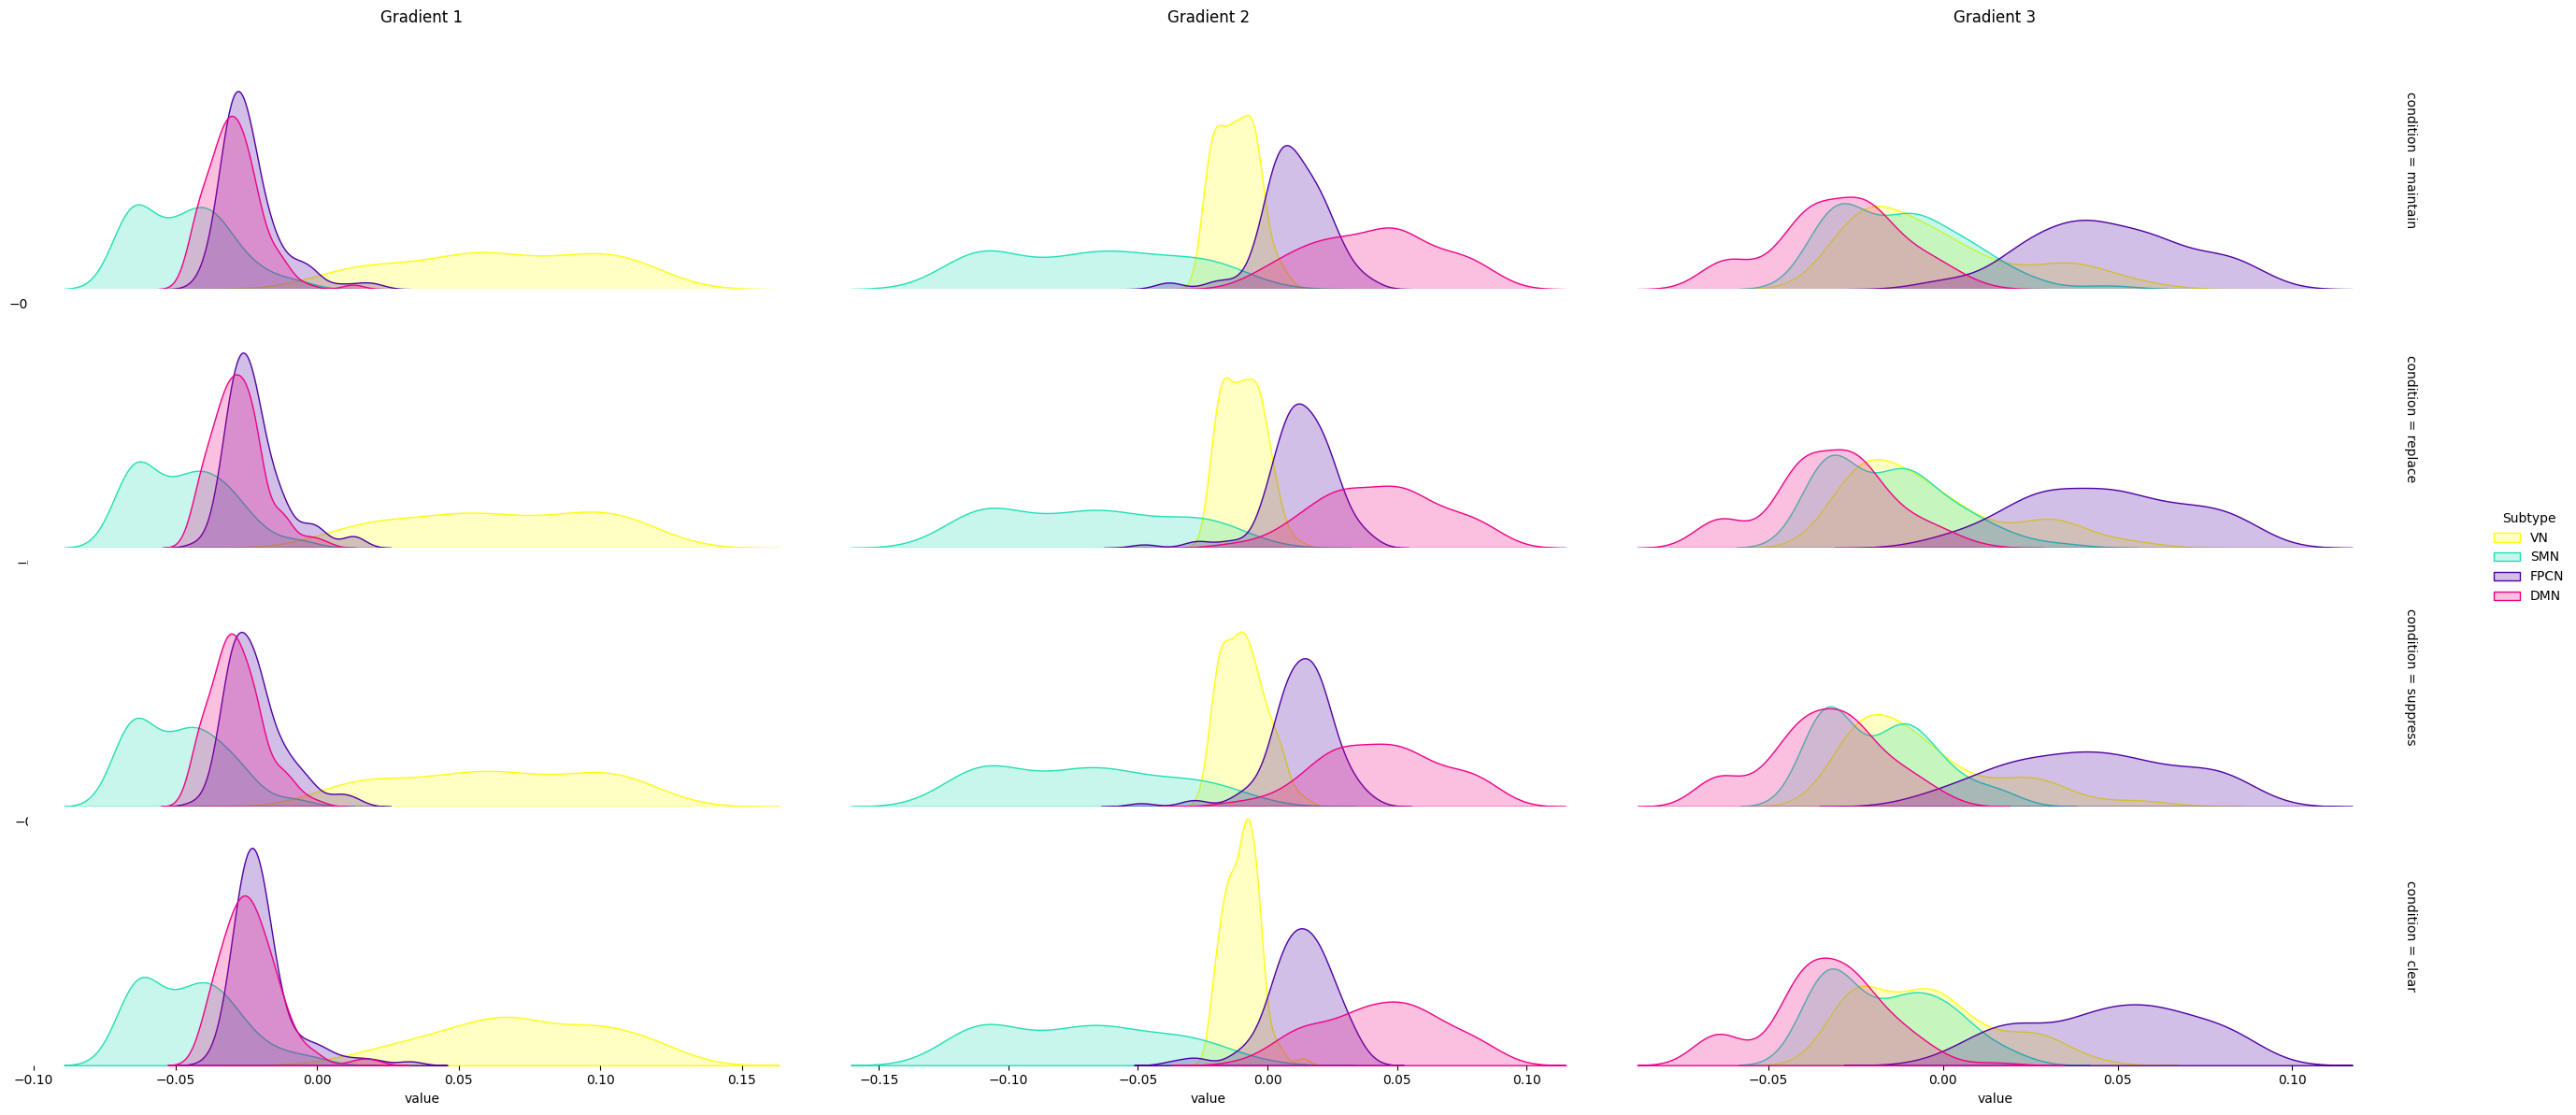

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming op_grads_long is already defined
df = op_grads_long.copy()

# Mapping Subtype values to their corresponding names
subtype_mapping = {1: 'VN', 2: 'SMN', 3: 'FPCN', 4: 'DMN'}
df['Subtype'] = df['Subtype'].map(subtype_mapping)

# Mapping group values to their corresponding names
group_mapping = {'g1': 'Gradient 1', 'g2': 'Gradient 2', 'g3': 'Gradient 3'}
df['group'] = df['group'].map(group_mapping)

# Defining the colors
net_cols = ['#FCFF0D', '#21DFB4', '#4E00A2', '#F00087']
subtype_palette = dict(zip(subtype_mapping.values(), net_cols))

# Plotting using Seaborn
g = sns.FacetGrid(df, row='condition', col='group', hue='Subtype', 
                  margin_titles=True, height=3, aspect=3, palette=subtype_palette, sharex=False)
g.map(sns.kdeplot, 'value', fill=True)

# Customizing the plot
g.add_legend()

# Remove 'condition = ' and 'group = ' from the titles
for ax in g.axes.flat:
    ax.set_title(ax.get_title().replace('condition = ', '').replace('group = ', ''))

# Remove y-axis and axis spines, add grid lines, and make plots closer together
for ax in g.axes.flat:
    ax.yaxis.set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    #ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgrey')
    ax.set_xlabel(ax.get_xlabel(), fontsize=10)

plt.subplots_adjust(hspace=0, wspace=0)
plt.show()


/projects/jade6100/software/anaconda/envs/jake/lib/python3.7/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/projects/jade6100/software/anaconda/envs/jake/lib/python3.7/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



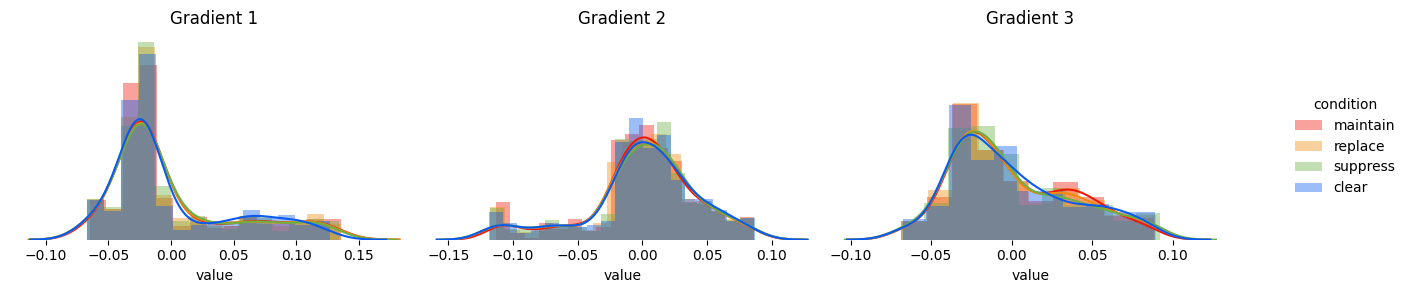

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming op_grads_long is already defined
df = op_grads_long.copy()

# Mapping Subtype values to their corresponding names
subtype_mapping = {1: 'VN', 2: 'SMN', 3: 'FPCN', 4: 'DMN'}
df['Subtype'] = df['Subtype'].map(subtype_mapping)

# Mapping group values to their corresponding names
group_mapping = {'g1': 'Gradient 1', 'g2': 'Gradient 2', 'g3': 'Gradient 3'}
df['group'] = df['group'].map(group_mapping)

# Defining the colors
ops_cols = ['#F0180A', '#F08B0A', '#6DAE45', '#0A5AF0']
condition_palette = dict(zip(df['condition'].unique(), ops_cols))

# Plotting using Seaborn
g = sns.FacetGrid(df, col='group', hue='condition', 
                  margin_titles=True, height=3, aspect=1.5, palette=condition_palette, sharex=False)
g.map(sns.distplot, 'value')


# Customizing the plot
g.add_legend()

# Remove 'group = ' from the titles
for ax in g.axes.flat:
    ax.set_title(ax.get_title().replace('group = ', ''))

# Remove y-axis and axis spines, add grid lines, and make plots closer together
for ax in g.axes.flat:
    ax.yaxis.set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    #ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgrey')
    ax.set_xlabel(ax.get_xlabel(), fontsize=10)

plt.subplots_adjust(hspace=0, wspace=0)
plt.show()
